<a href="https://colab.research.google.com/github/MAHAMAT263/formative_II_group_assignments/blob/kayitesililianemodel/kayitesi_liliane__formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import random
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, f1_score

In [2]:
#LOAD THE DATA
df = pd.read_csv('water_potability.csv')
df = df.dropna()
X = df.drop('Potability', axis=1).values
y = df['Potability'].values
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Plot the Data Appropriately

<ipython-input-18-b61d907e583b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Potability", data=df, palette="Set2")


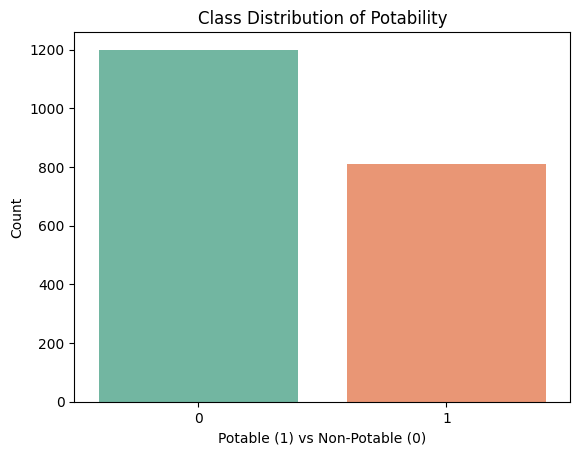

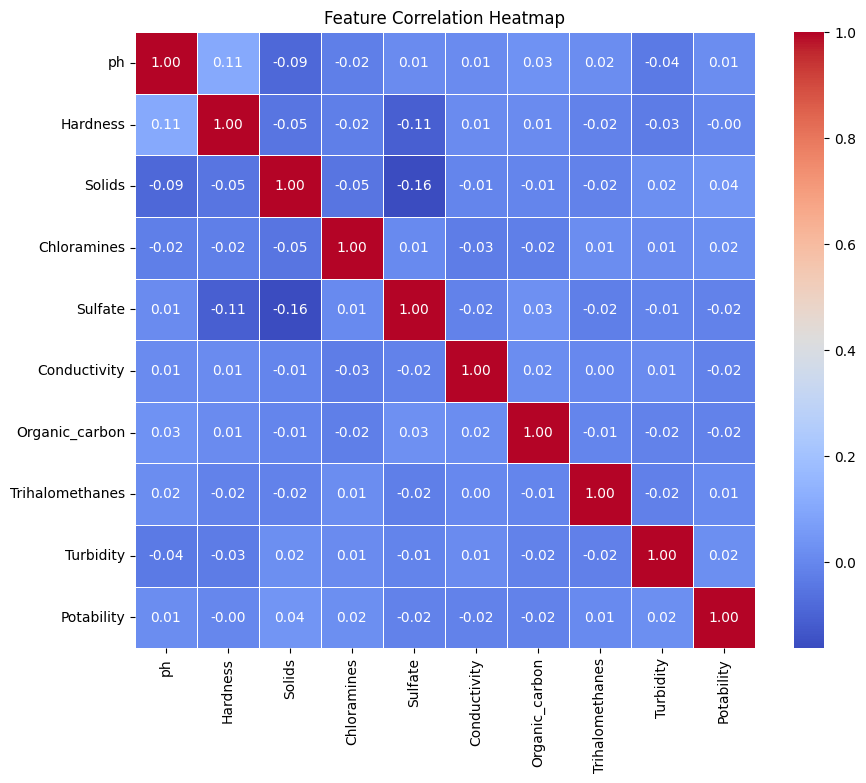

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns



# Check class balance
sns.countplot(x="Potability", data=df, palette="Set2")
plt.title("Class Distribution of Potability")
plt.xlabel("Potable (1) vs Non-Potable (0)")
plt.ylabel("Count")
plt.show()

# Plot feature correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

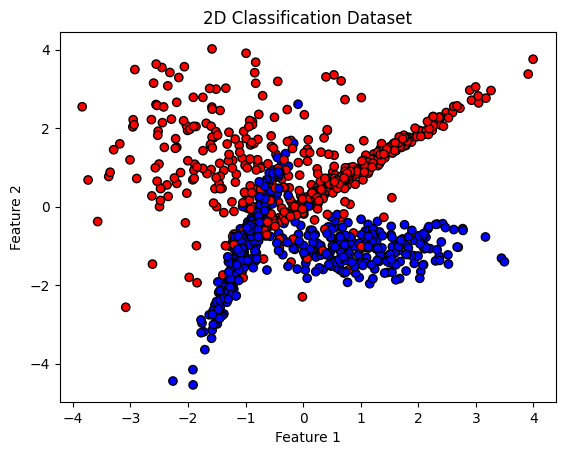

In [3]:

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate a dataset with 2 features and binary classes
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Classification Dataset")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

# sample dataset with 100 samples and 2 features
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)  # Binary labels (0 or 1)

#split 70% training and 30% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# splitting the remaining 30% into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print the shapes to verify
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (70, 2), (70,)
Validation set: (15, 2), (15,)
Testing set: (15, 2), (15,)


# Each Memeber Defines their model Here

In [5]:
# Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [6]:
def model_liliane():
    model = keras.Sequential([
        layers.Dense(16, activation="relu", input_shape=(2,)),
        layers.Dropout(0.3),
        layers.Dense(8, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])
    return model

# Create and verify the model
custom_model = model_liliane()
custom_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Train Accuracy: 0.488
Validation Accuracy: 0.667
Test Accuracy: 0.500
Test F1 Score: 0.667


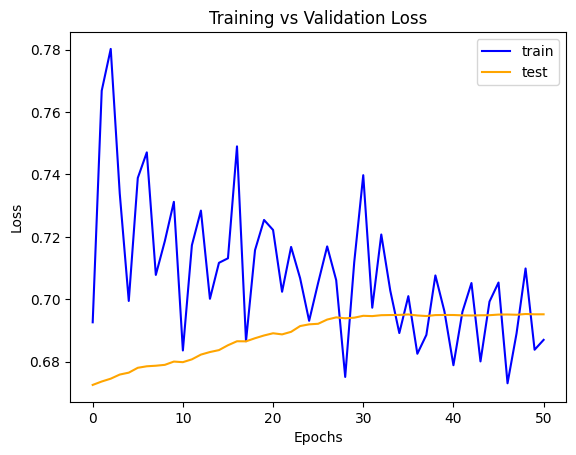

In [17]:
# Defining early stopping
es = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Training the model
history = custom_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=4000,
    verbose=0,
    callbacks=[es]
)

# Evaluate on test data
y_pred = (custom_model.predict(X_test) > 0.5).astype(int)

# model evaluation
_, train_acc = custom_model.evaluate(X_train, y_train, verbose=0)
_, val_acc = custom_model.evaluate(X_val, y_val, verbose=0)
_, test_acc = custom_model.evaluate(X_test, y_test, verbose=0)
test_f1_score = f1_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")
print(f'Test F1 Score: {test_f1_score:.3f}')

## Plot the training and validation loss
plt.plot(history.history['loss'], label='train', color='blue')
plt.plot(history.history['val_loss'], label='test', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()




In [13]:

from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision  recall  f1-score  support
0                  0.00     0.0  0.000000     10.0
1                  0.50     1.0  0.666667     10.0
accuracy           0.50     0.5  0.500000      0.5
macro avg          0.25     0.5  0.333333     20.0
weighted avg       0.25     0.5  0.333333     20.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 **Training** **summary table**

| Member Name     | Regularization technique | Optimizer | Early Stopping Criteria       | Dropout Rate                   | Train Accuracy | Validation Accuracy | Test Accuracy |
|------------------|-------------|-----------|-------------------------------|--------------------------------|----------------|----------------------|---------------|
| kayitesi Liliane    | Dropout       | RMSprop   | Monitor: val_loss, Patience: 50 | 0.3 (Layer 1), 0.2 (Layer 2) | 0.663    | 0.533`           | *0.450*`    |

